# Hlasování - Popis

In [ ]:
from datetime import datetime

In [2]:
from nastav_jupyter_notebook import nastav_pandas, nastav_google_colab

nastav_google_colab()
nastav_pandas()

In [3]:
from snemovna.Snemovna import *
from snemovna.Hlasovani import *
from snemovna.utility import *

## Tabulka Hlasování

In [4]:
h = Hlasovani(stahni=True)

2021-03-12:15:47:13 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:14 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


In [5]:
h.popis()

Počet řádků v tabulce: 8689

Nenalyzované sloupce: ['cas']

Sloupce s jedinou hodnotou:
  'id_organ' má všude hodnotu '172'
  'nazev_kratky' má všude hodnotu '<NA>'
  'druh_hlasovani' má všude hodnotu 'normální'
  'ma_stenozaznam' má všude hodnotu 'False'

Nulové hodnoty: 
Sloupec 'nazev_dlouhy' obsahuje 0.03% (3 z 8689) nulových hodnot (např. NaNů).
Sloupec 'nazev_kratky' obsahuje 99.99% (8688 z 8689) nulových hodnot (např. NaNů).
Sloupec 'turn' obsahuje 100.00% (8689 z 8689) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 100.00% (8689 z 8689) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
id_hlasovani                       8689                     8689   
id_organ                              1                     8689   
schuze                               87                     8689   
cislo                              1074                     8689   
bod                                 400                     8689   
pro                                 197                     8689   
proti                               156                     8689   
zdrzel                              158                     8689   
nehlasoval                           51                     8689   
prihlaseno                          147                     8689   
kvorum                               80                     8689   
nazev_dlouhy                        748                     8686   
nazev_kratky                          1                        1   
datum                              7241                     8689   
bod__KAT                              2                     8689   
vysledek                              2                     8689   
druh_hlasovani                        1                     8689   
je_zpochybneni                        2                     8689   
je_zmatecne                           2                     8689   
ma_stenozaznam                        1                     8689   
turn                                  0                        0   
typ                                   0                        0   

                                          typ vlastni  \
id_hlasovani                            Int64   False   
id_organ                                Int64   False   
schuze                                  Int64   False   
cislo                                   Int64   False   
bod                                     Int64   False   
pro                                     Int64   False   
proti                                   Int64   False   
zdrzel                                  Int64   False   
nehlasoval                              Int64   False   
prihlaseno                              Int64   False   
kvorum                                  Int64   False   
nazev_dlouhy                           string   False   
nazev_kratky                           string   False   
datum           datetime64[ns, Europe/Prague]    True   
bod__KAT                               string    True   
vysledek                               string    True   
druh_hlasovani                         string    True   
je_zpochybneni                           bool    True   
je_zmatecne                              bool    True   
ma_stenozaznam                           bool    True   
turn                                    Int64   False   
typ                                    string    True   

                                                                                                                                                          popis  \
id_hlasovani                                                                                             Identifikátor hlasování, viz hl_hlasovani:id_hlasovani   
id_organ                                                                                                              Identifikátor orgánu, viz Organy:id_organ   
schuze                                                                                                                                             Číslo schůze   
cislo                                                                                                                                           Číslo hlasování   
bod             Bod pořadu schůze; je-li menší než 1, pak jde o procedurální hlasování nebo o hlasování k bodům, které v době hlasování neměly přiděleno číslo.   
pro                                                                                                                                       Počet hlasujících pro  

In [6]:
popis_sloupec(h, 'bod__KAT')

Typ: string
Počet hodnot: 8689
Počet unikátních hodnot: 2
První hodnota: normální
Poslední hodnota: normální


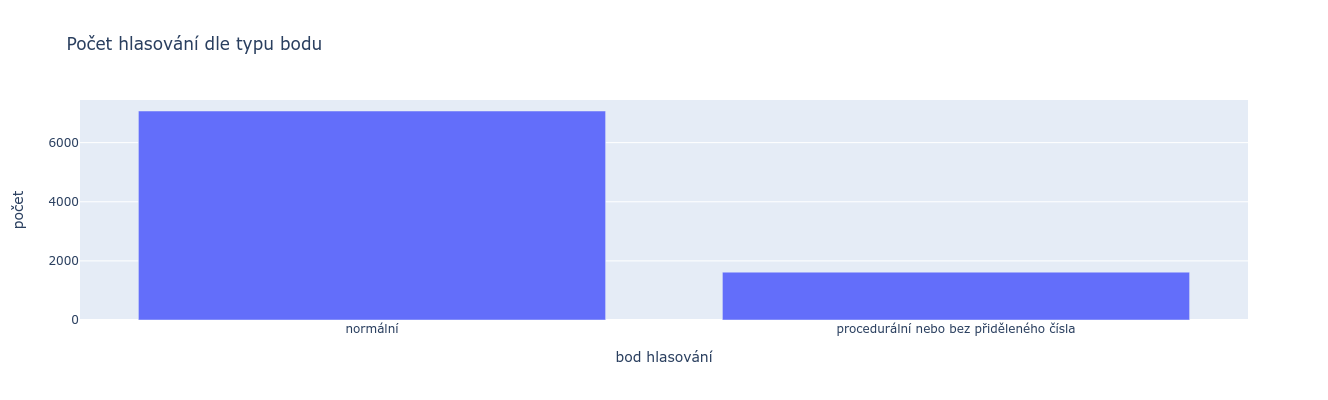

In [7]:
# Bod pořadu schůze; je-li menší než 1, pak jde o procedurální hlasování nebo o hlasování k bodům, které v době hlasování neměly přiděleno číslo.
fig = groupby_bar(h, by=['bod__KAT'], xlabel='bod hlasování', ylabel='počet', title="Počet hlasování dle typu bodu")
fig.show()

In [8]:
popis_sloupec(h, 'vysledek')

Typ: string
Počet hodnot: 8689
Počet unikátních hodnot: 2
První hodnota: přijato
Poslední hodnota: přijato


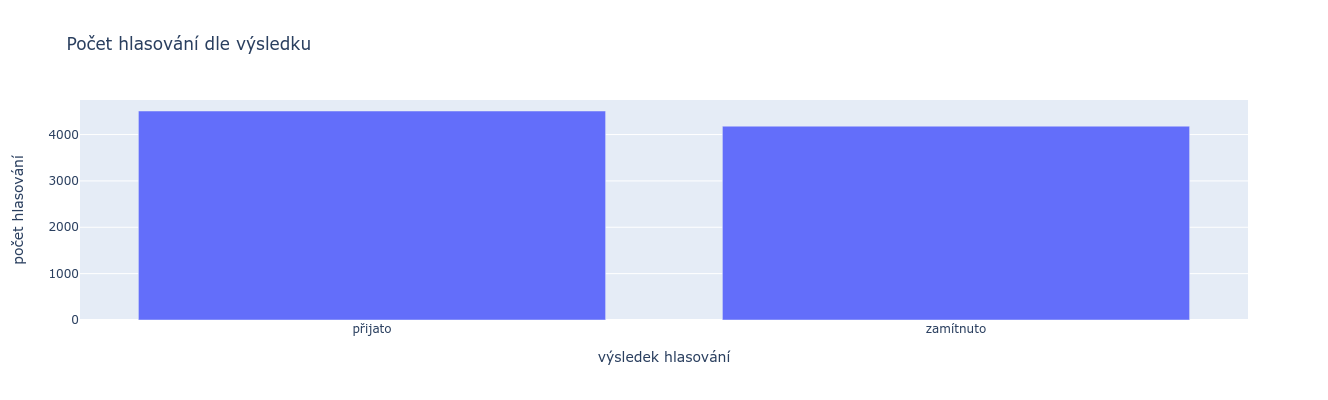

In [9]:
fig = groupby_bar(h, by=['vysledek'], xlabel='výsledek hlasování', ylabel='počet hlasování', title="Počet hlasování dle výsledku")
fig.show()

In [10]:
popis_sloupec(h, 'druh_hlasovani')

Typ: string
Počet hodnot: 8689
Počet unikátních hodnot: 1
První hodnota: normální
Poslední hodnota: normální


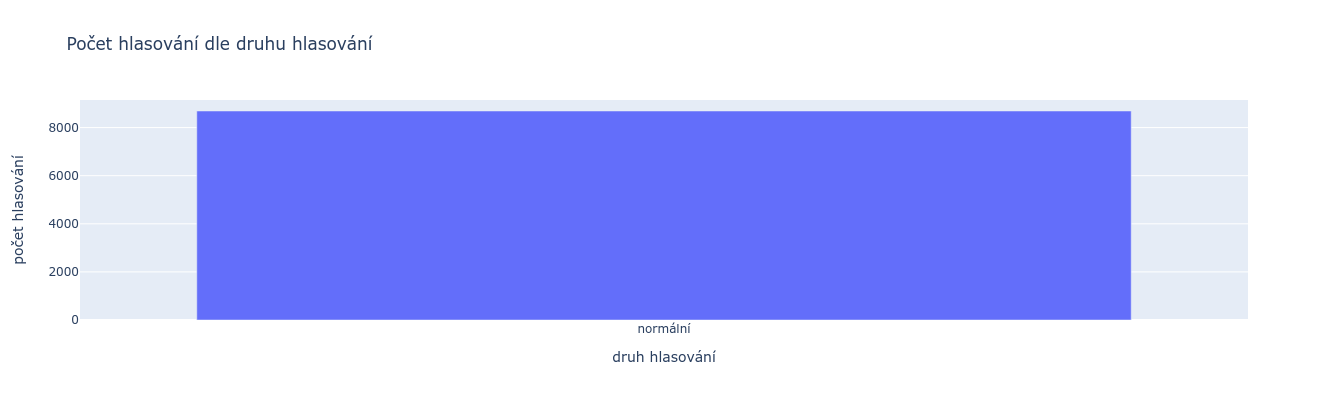

In [11]:
fig = groupby_bar(h, by=['druh_hlasovani'], xlabel='druh hlasování', ylabel='počet hlasování', title="Počet hlasování dle druhu hlasování")
fig.show()

In [12]:
popis_sloupec(h, 'datum')

Typ: datetime64[ns, Europe/Prague]
Počet hodnot: 8689
Počet unikátních hodnot: 7241
První hodnota: 2017-11-20 13:53:00+01:00
Poslední hodnota: 2021-03-11 12:45:00+01:00


Nejvíce hlasování (1145) se uskutečnilo mezi 11:00 a 11:59.
Nejméně hlasování (1) se uskutečnilo mezi 3:00 a 3:59.


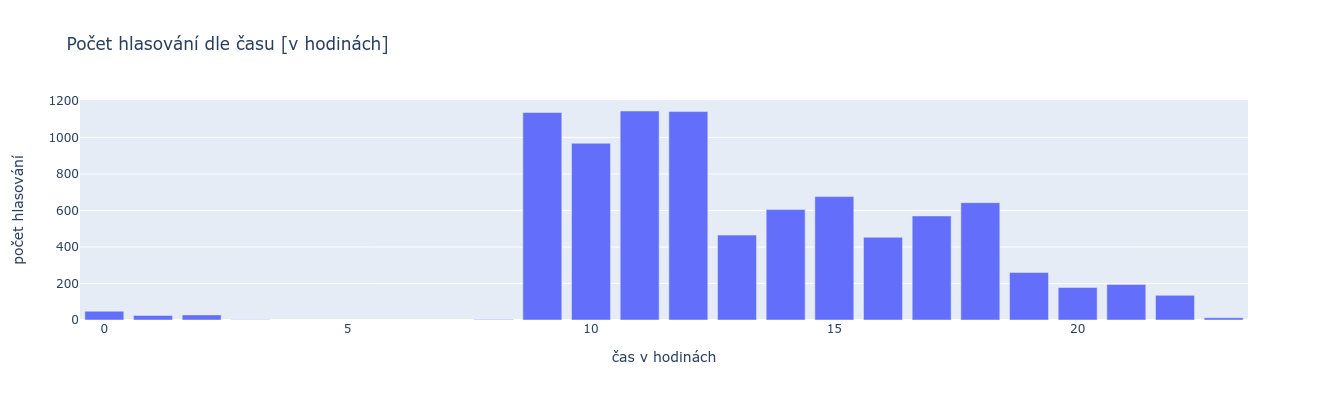

In [13]:
# hlasovani dle hodiny

df = h.groupby(h.datum.dt.hour).size()
max_idx = df.sort_values().index[-1]
min_idx = df.sort_values().index[0]
print(f"Nejvíce hlasování ({df.loc[max_idx]}) se uskutečnilo mezi {max_idx}:00 a {max_idx}:59.")
print(f"Nejméně hlasování ({df.loc[min_idx]}) se uskutečnilo mezi {min_idx}:00 a {min_idx}:59.")

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df.index,
    y=df.values,
    text=[f"{t}:00 - {t}:59" for t in df.index],
    hovertemplate="Interval: %{text}<br>Počet hlasování:%{y}<extra></extra>",
))

fig.update_layout(
    title="Počet hlasování dle času [v hodinách]",
    xaxis_title="čas v hodinách",
    yaxis_title="počet hlasování",
    width=600,
    height=400
)

fig.show()

Nejvíce hlasování (3586) se uskutečnilo během dne: středa.
Nejméně hlasování (7) se uskutečnilo během dne: pondělí.


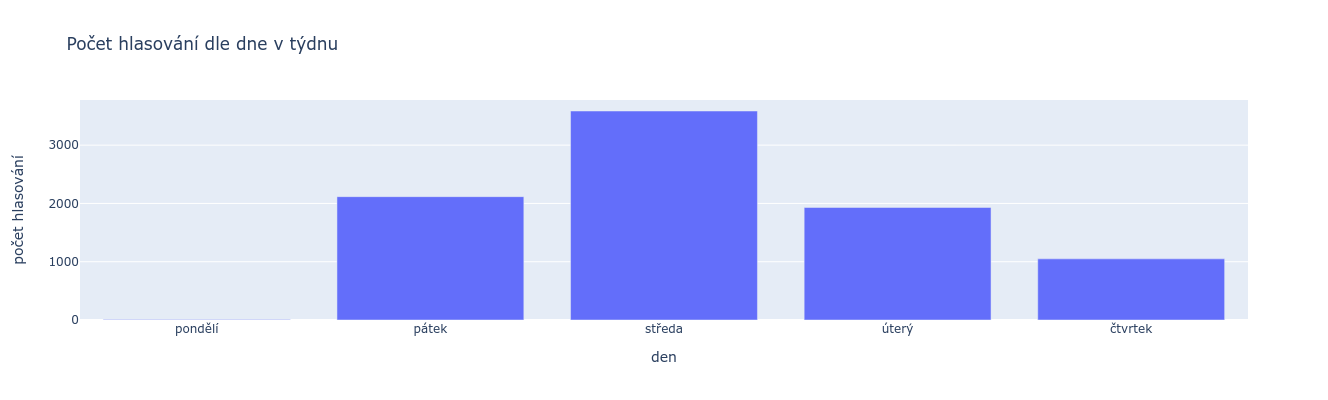

In [14]:
# hlasovani dle dne z týdne

day_dict = {'Monday':'pondělí', "Tuesday":'úterý', "Wednesday":'středa', "Thursday":'čtvrtek', "Friday":'pátek', "Saturday":'sobota', "Sunday":'neděle'}

df = h.groupby(h.datum.dt.strftime('%A').map(day_dict)).size()
max_idx = df.sort_values().index[-1]
min_idx = df.sort_values().index[0]
print(f"Nejvíce hlasování ({df.loc[max_idx]}) se uskutečnilo během dne: {max_idx}.")
print(f"Nejméně hlasování ({df.loc[min_idx]}) se uskutečnilo během dne: {min_idx}.")

fig = go.Figure()

index =  df.index
values = [df.loc[d] for d in index]
text = index
fig.add_trace(go.Bar(
    x=index,
    y=values,
    text=text,
    hovertemplate="Den: %{text}<br>Počet hlasování:%{y}<extra></extra>",
))

fig.update_layout(
    title="Počet hlasování dle dne v týdnu",
    xaxis_title="den",
    yaxis_title="počet hlasování",
    width=600,
    height=400
)

fig.show()

In [15]:
# Všechna pondělní hlasování.
# V pondělí se hlasuje velmi zřídka.

h[h.datum.dt.strftime("%A") == 'Monday']

id_hlasovani  id_organ  schuze  cislo  bod       cas  pro  proti  \
0            67018       172       1      1    3  13:53:00  191      0   
1            67019       172       1      2    3  13:53:00  194      0   
2            67020       172       1      3    0  14:47:00   50    129   
3            67021       172       1      4    4  15:39:00   56    100   
4            67022       172       1      5    4  15:39:00  174     19   
5275         72295       172      40    338    0  13:14:00    0      0   
7147         74167       172      62    165    0  08:45:00    0      0   

      zdrzel  nehlasoval  ...  nazev_kratky                     datum  \
0          5           0  ...          <NA> 2017-11-20 13:53:00+01:00   
1          4           0  ...          <NA> 2017-11-20 13:53:00+01:00   
2         19           0  ...          <NA> 2017-11-20 14:47:00+01:00   
3         37           6  ...          <NA> 2017-11-20 15:39:00+01:00   
4          4           2  ...          <NA> 2017-11-20 15:39:00+01:00   
5275       0           0  ...          <NA> 2020-03-02 13:14:00+01:00   
7147       0           0  ...          <NA> 2020-10-26 08:45:00+01:00   

                                     bod__KAT   vysledek druh_hlasovani  \
0                                    normální    přijato       normální   
1                                    normální    přijato       normální   
2     procedurální nebo bez přiděleného čísla  zamítnuto       normální   
3                                    normální  zamítnuto       normální   
4                                    normální    přijato       normální   
5275  procedurální nebo bez přiděleného čísla  zamítnuto       normální   
7147  procedurální nebo bez přiděleného čísla  zamítnuto       normální   

     je_zpochybneni je_zmatecne ma_stenozaznam  turn   typ  
0             False        True          False  <NA>  <NA>  
1             False       False          False  <NA>  <NA>  
2             False       False          False  <NA>  <NA>  
3             False       False          False  <NA>  <NA>  
4             False       False          False  <NA>  <NA>  
5275          False       False          False  <NA>  <NA>  
7147          False        True          False  <NA>  <NA>  

[7 rows x 23 columns]

In [16]:
def pocet_hlasovani_dle_data(df, resample_to, resample_str, resample_label):
    frame = df.set_index('datum').resample(resample_to).size()
    frame = frame.mask(frame == 0, None).dropna()

    max_idx = frame.sort_values().index[-1]
    min_idx = frame.sort_values().index[0]
    print(f"Nejvíce hlasování ({frame.loc[max_idx]}) se uskutečnilo {max_idx.strftime(resample_str)}.")
    print(f"Nejméně hlasování ({frame.loc[min_idx]}) se uskutečnilo {min_idx.strftime(resample_str)}.")

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=frame.index,
        y=frame.values,
        hovertemplate="%{x}<br>počet hlasování: %{y}<extra></extra>"
    ))
    
    fig.update_layout(
        title=f"Počet hlasování dle data ({resample_label})",
        xaxis_title=f"datum ({resample_label})",
        yaxis_title="počet hlasování",
        width=1200,
        height=500
    )

    dt_all = pd.date_range(start=frame.index[0],end=frame.index[-1])
    dt_obs = [d.strftime(resample_str) for d in frame.index]
    dt_breaks = [d for d in dt_all.strftime(resample_str).tolist() if not d in dt_obs]
    # nezobrazuj data bez hlasování
    #dt_all = pd.date_range(start=df.index[0], end=df.index[-1])
    #dt_obs = [d.strftime(resample_str) for d in df.index]
    #dt_breaks = [d for d in dt_all.strftime(resample_str).tolist() if not d in dt_obs]

    fig.update_xaxes(
        rangebreaks=[dict(values=dt_breaks)]
    )
    
    fig.show()

Nejvíce hlasování (387) se uskutečnilo 2019-06-05.
Nejméně hlasování (1) se uskutečnilo 2019-06-27.


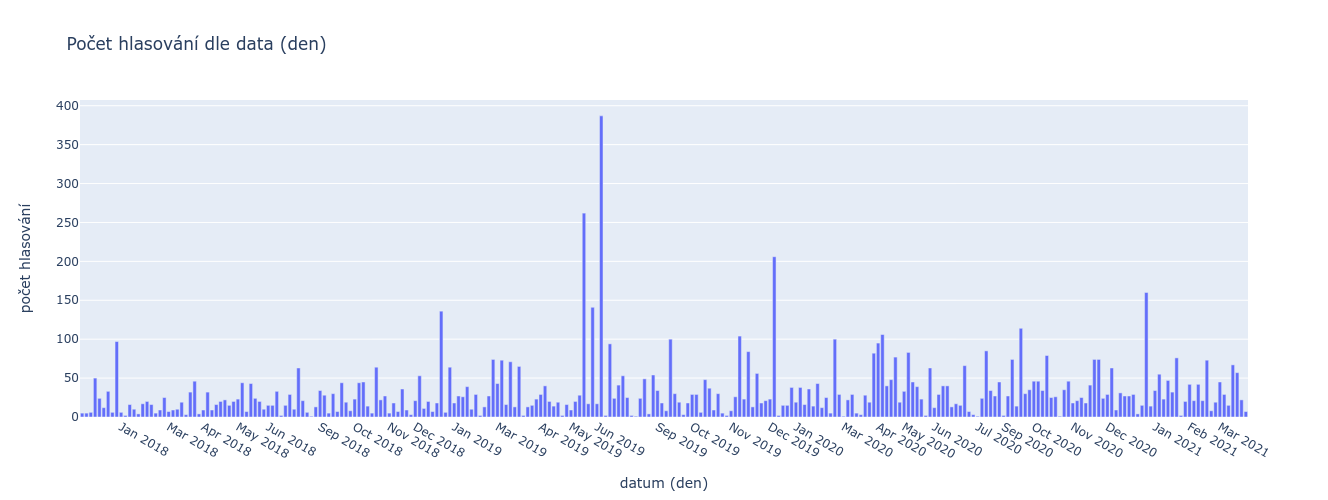

In [17]:
pocet_hlasovani_dle_data(h, "D", "%Y-%m-%d", "den")

Nejvíce hlasování (646) se uskutečnilo 2019-06.
Nejméně hlasování (13) se uskutečnilo 2018-08.


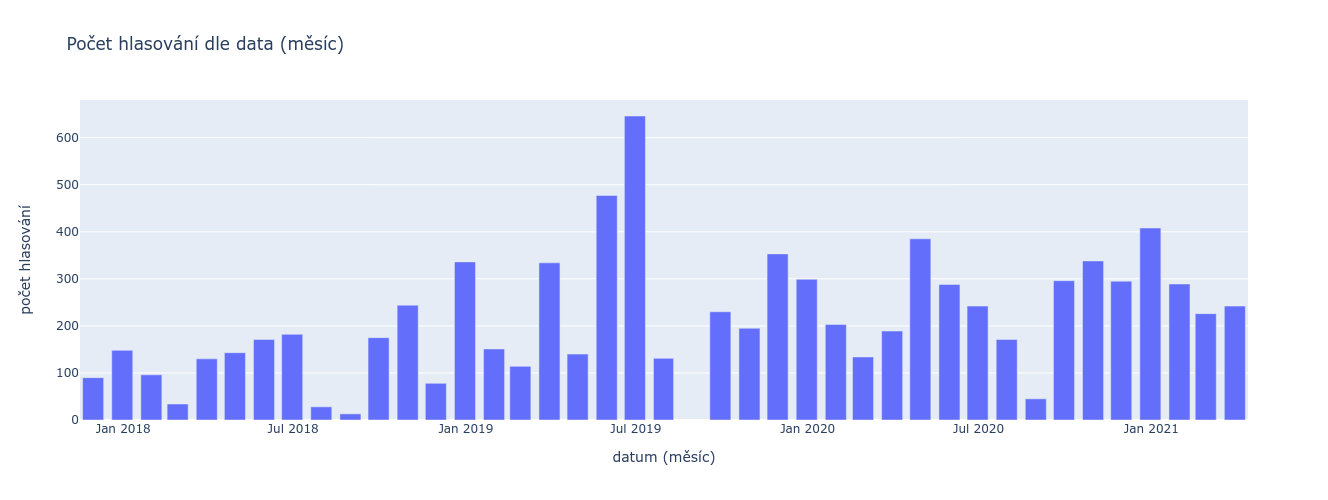

In [18]:
pocet_hlasovani_dle_data(h, "M", "%Y-%m", "měsíc")

In [19]:
# Přidej kontrolní sloupec pro součet hlasování
h['soucet_hlasovani'] =  h.pro + h.proti + h.nehlasoval + h.zdrzel

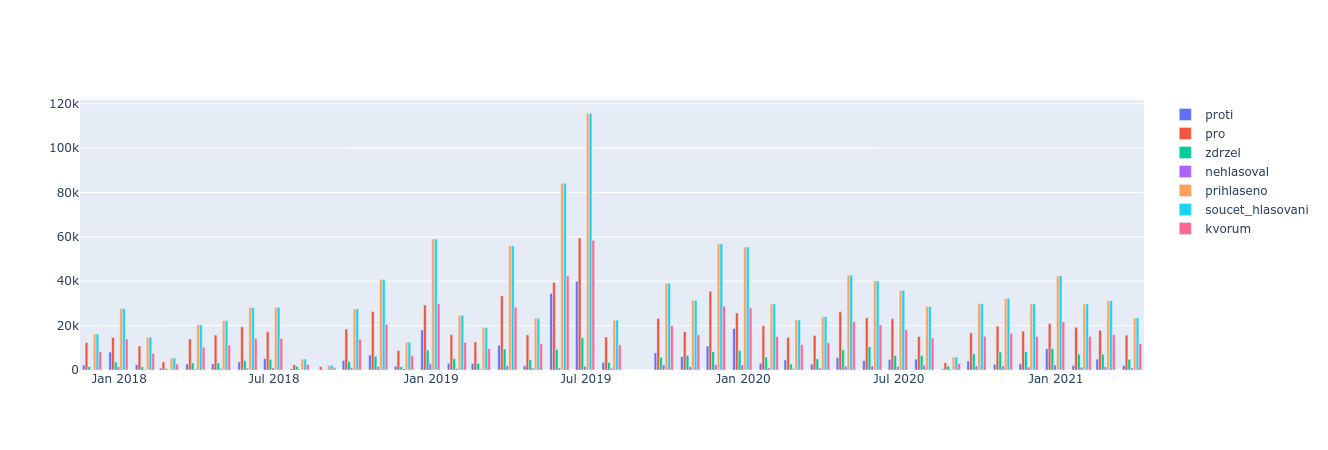

In [20]:
def resampled_bar(df, field, interval="D", date_format="%Y-%m-%d", operation='sum', name=None, type='scatter'):
    name = name if name is not None else field    
    frame = df.set_index("datum")[field].resample(interval).agg(operation)
    trace = go.Bar(x=frame.index, y=frame.values, name=name)
    return trace

interval = 'M'
fig = go.Figure()
fig.add_trace(resampled_bar(h, field="proti", interval=interval))
fig.add_trace(resampled_bar(h, field="pro", interval=interval))
fig.add_trace(resampled_bar(h, field="zdrzel", interval=interval))
fig.add_trace(resampled_bar(h, field="nehlasoval", interval=interval))
fig.add_trace(resampled_bar(h, field="prihlaseno", interval=interval))
fig.add_trace(resampled_bar(h, field="soucet_hlasovani", interval=interval))
fig.add_trace(resampled_bar(h, field="kvorum", interval=interval))

fig.show()

In [21]:
# Najdi nekonzistentní součty vysledků hlasování, tj. případy, kdy hlasoval jiný počet poslanců, než kolik jich bylo přihlášeno k hlasování.
# TODO: Ověř, že poslanci mají právo hlasovat, i když nejsou přihlášeni.

fields = ["schuze", "bod", "nazev_dlouhy", "pro", "proti", "nehlasoval", "zdrzel", "prihlaseno", "vysledek", "je_zmatecne"]
h[h.soucet_hlasovani != h.prihlaseno][fields]

schuze  bod                                       nazev_dlouhy  pro  \
1531      23    1  Návrh na vyslovení nedůvěry vládě České republiky   92   
3729      32    1  Návrh na vyslovení nedůvěry vládě České republiky   85   

      proti  nehlasoval  zdrzel  prihlaseno   vysledek  je_zmatecne  
1531     92          18       0         182  zamítnuto        False  
3729     85          18      12         182  zamítnuto        False

In [22]:
h["mira_jednomyslnosti"] = (h.pro - h.proti).abs() / (h.pro + h.proti)
h["mira_jednomyslnosti"].describe()

count    8665.000000
mean        0.655366
std         0.382657
min         0.000000
25%         0.250000
50%         0.853659
75%         1.000000
max         1.000000
Name: mira_jednomyslnosti, dtype: float64

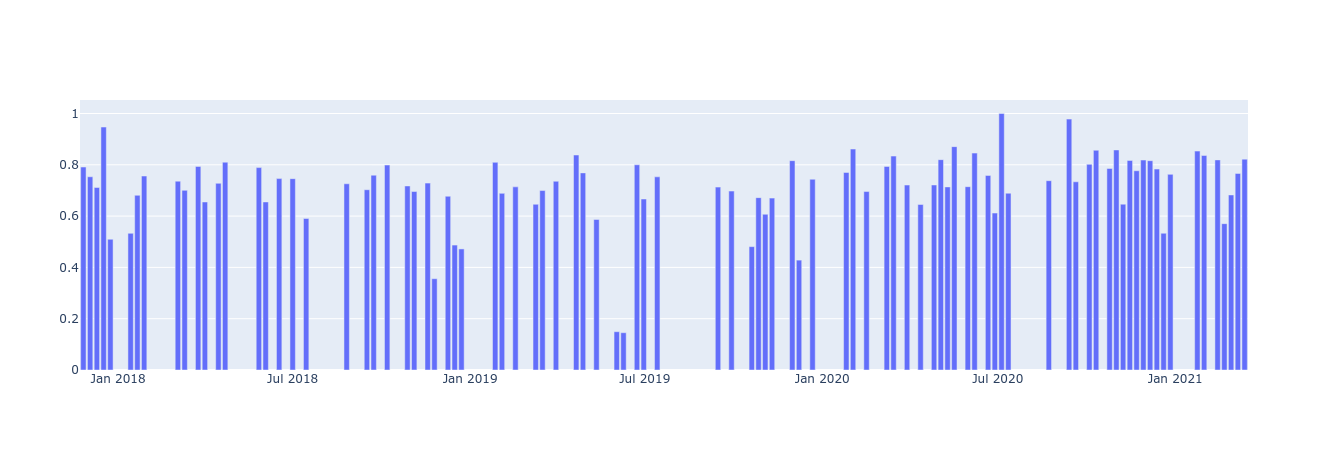

In [23]:
interval = 'W'
fig = go.Figure()
fig.add_trace(resampled_bar(h, field="mira_jednomyslnosti", interval=interval, operation="mean"))
fig.show()

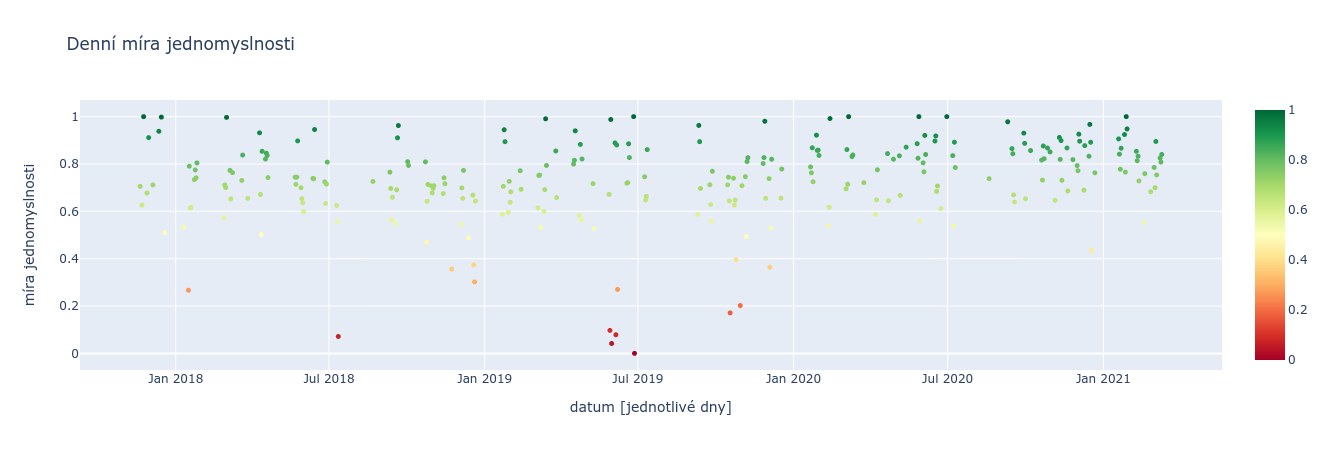

In [24]:
# denní míra jednomyslnosti

precision = 3 

def A_razeno_dle_B(x, A, B):
    df = x.groupby(A)[B].mean().sort_values(ascending=True)
    return("<br>".join(map(str, df.index.astype(str) + ': ' + df.values.round(precision).astype(str))))

days = 7
interval = f"{days}D"

df = pd.DataFrame()
df['mira_jednomyslnosti_za_den_mean'] = h.groupby(h.datum.dt.date).mira_jednomyslnosti.mean()
df['nazev_dlouhy_za_den'] = h.groupby(h.datum.dt.date)[['nazev_dlouhy', 'mira_jednomyslnosti']].apply(
    lambda x: A_razeno_dle_B(x, "nazev_dlouhy", "mira_jednomyslnosti")
) 
df.index = pd.to_datetime(df.index)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df.mira_jednomyslnosti_za_den_mean,
    text=df.nazev_dlouhy_za_den,
    name="míra jednomyslnosti za den",
    mode="markers",
     marker=dict(
        size=5,
        color=df.mira_jednomyslnosti_za_den_mean,
        colorscale='RdYlGn', # one of plotly colorscales
        showscale=True
    ),
    hovertemplate =
        '<b>%{x}</b>'+
        '<br><br><b>Průměrná míra jednomyslnosti</b>: <i>%{y:.3f}</i>'+
        '<br><br><b>Hlasování dle míry jednomyslnosti (vzestupně):</b><br>%{text}<extra></extra>',
    hoverlabel=dict(
        bgcolor='white',
        font=dict(color='black')
    )
))

fig.update_layout(title="Denní míra jednomyslnosti", xaxis=dict(title="datum [jednotlivé dny]"), yaxis=dict(title="míra jednomyslnosti"))

fig.show()

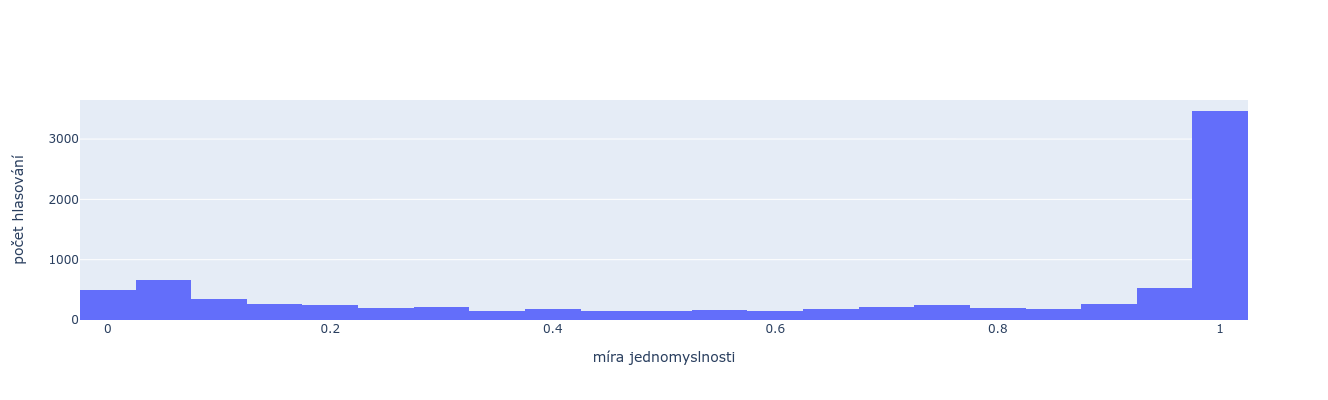

In [25]:
fig = go.Figure(go.Histogram(x=h.mira_jednomyslnosti, hovertemplate="míra jednomyslnosti: %{x}<br>počet hlasování: %{y}<extra></extra>"))
fig.update_layout(width=700, height=400, xaxis=dict(title="míra jednomyslnosti"), yaxis=dict(title="počet hlasování"))
fig.show()

In [26]:
print(f"Jednomyslně schválená hlasování (vysoká míra jednomyslnosti): {h[h.mira_jednomyslnosti == 1].index.size}")
jednomyslna_temata = h[h.mira_jednomyslnosti == 1].groupby('nazev_dlouhy').size().sort_values(ascending=False)
print(jednomyslna_temata.head(20))

Jednomyslně schválená hlasování (vysoká míra jednomyslnosti): 3060
nazev_dlouhy
Pořad schůze                                                              527
                                                                          126
Návrh na vyslovení souhlasu PS s prodloužením doby nouzového stavu         69
Návrh na změny ve složení orgánů Poslanecké sněmovny                       59
Návrhy PS na propůjčení nebo udělení státních vyznamenání                  45
Vl.n.z. v souv.s elektronizací postupů orgánů veřejné moci                 33
Návrhy Poslanecké sněmovny na propůjčení nebo udělení státních vyzname     26
Novela z. - školský zákon                                                  26
Novela z. o daních z příjmů                                                23
Novela z. o kompenzačním bonusu                                            23
Novela z. - trestní řád                                                    23
Vl. n. z. kterým se mění některé zákony v oblasti daní - EU   

In [27]:
print(f"Hlasování se zcela vyrovnaným pro a proti (nízká míra jednomyslnosti): {h[h.mira_jednomyslnosti == 0].index.size}")
nejednomyslna_temata = h[h.mira_jednomyslnosti == 0].groupby('nazev_dlouhy').size().sort_values(ascending=False)
print(nejednomyslna_temata.head(20))

Hlasování se zcela vyrovnaným pro a proti (nízká míra jednomyslnosti): 73
nazev_dlouhy
Novela z. o evidenci tržeb - EU                                 28
Pořad schůze                                                     7
Vl.n.z. o kompenzačním bonusu v souv. s krizovými opatřeními     5
Vl.n.z.o opatř.ke zmírnění dopadů SARS CoV-2 na nájemce byt.     2
Novela z. - horní zákon                                          2
Vl.n.z. o státním rozpočtu ČR na rok 2021                        2
Návrh na vyslovení nedůvěry vládě České republiky                2
Novela z. o rozpočtových pravidlech                              2
Vln. z. o kompenzačním bonusu pro rok 2021                       1
Novela z. o některých úpravách v oblasti evidence tržeb          1
Novela z. o pomoci v hmotné nouzi                                1
Novela z. o obcích                                               1
Novela z. o evidenci tržeb                                       1
Novela z. o důchodovém pojištění          

In [28]:
# Témata hlasování s nejvyšší mírou jednomyslnosti a jejich počty

cnt = 20
x = pd.DataFrame()
x['celkovy_pocet_hlasovani_dle_tematu'] =  h.groupby('nazev_dlouhy').size()
x['prumerna_mira_jednomyslnosti_dle_tematu'] = h.groupby('nazev_dlouhy')['mira_jednomyslnosti'].mean()
x.sort_values(by='prumerna_mira_jednomyslnosti_dle_tematu', ascending=False).head(cnt)

celkovy_pocet_hlasovani_dle_tematu  \
nazev_dlouhy                                                                                                 
Vl.n.z. - invazní nepůvodní druhy - EU                                                                   3   
Písemná interpelace O. Profanta na A. Babiše ve věci interpelace na př                                   1   
Novela z. o řízení motorových vozidel                                                                    4   
Písemná interpelace J. Jandy na A. Babiše ve věci podpory sportovní ob                                   1   
Novela z. o úřednících územních samospráv. celků - EU                                                    2   
Novela z. o Policii ČR                                                                                   1   
Písemná interpelace J. Skopečka na L. Metnara ve věci výběrového řízen                                   1   
Novela z. o Státním fondu dopravní infrastruktury                                                        3   
Vl.n.z.o poskyt.st.záruky ČR na zajištění půjčky ČNB pro MMF                                             2   
Písemná interpelace M. Grebeníčka na L. Zaorálka ve věci situace v Nár                                   1   
Vl.n.z.o opařeních ke zmír.dopadů epid.v pracovněpr.vzt.                                                 3   
Novela z. o zdravotnických prostředcích                                                                  2   
Novela z. o archivnictví a spisové službě                                                                1   
Výroční zpráva a účetní závěrka SFRB za rok 2016                                                         1   
Novela z. o zadávání veřejných zakázek                                                                   2   
Písemná interpelace O. Richterové na J. Maláčovou ve věci pracovní reh                                   1   
Písemná interpelace O. Richterové na J. Maláčovou ve věci pravidel pro                                   1   
Písemná interpelace S. Blahy na K. Havlíčka ve věci zabezpečení železn                                   1   
Novela z. o veřejném zdravotním pojištění - EU                                                           1   
Novela z. o distribuci pojištění a zajištění                                                             2   

                                                                        prumerna_mira_jednomyslnosti_dle_tematu  
nazev_dlouhy                                                                                                     
Vl.n.z. - invazní nepůvodní druhy - EU                                                                      1.0  
Písemná interpelace O. Profanta na A. Babiše ve věci interpelace na př                                      1.0  
Novela z. o řízení motorových vozidel                                                                       1.0  
Písemná interpelace J. Jandy na A. Babiše ve věci podpory sportovní ob                                      1.0  
Novela z. o úřednících územních samospráv. celků - EU                                                       1.0  
Novela z. o Policii ČR                                                                                      1.0  
Písemná interpelace J. Skopečka na L. Metnara ve věci výběrového řízen                                      1.0  
Novela z. o Státním fondu dopravní infrastruktury                                                           1.0  
Vl.n.z.o poskyt.st.záruky ČR na zajištění půjčky ČNB pro MMF                                                1.0  
Písemná interpelace M. Grebeníčka na L. Zaorálka ve věci situace v Nár                                      1.0  
Vl.n.z.o opařeních ke zmír.dopadů epid.v pracovněpr.vzt.                                                    1.0  
Novela z. o zdravotnických prostředcích                                                                     1.0  
Novela z. o archivnictví a spisové službě              

In [29]:
# Témata hlasování s nízkou mírou jednomyslnosti a jejich počty

cnt = 20
x = pd.DataFrame()
x['celkovy_pocet_hlasovani_dle_tematu'] =  h.groupby('nazev_dlouhy').size()
x['prumerna_mira_jednomyslnosti_dle_tematu'] = h.groupby('nazev_dlouhy')['mira_jednomyslnosti'].mean()
x.sort_values(by='prumerna_mira_jednomyslnosti_dle_tematu', ascending=False).tail(cnt)

celkovy_pocet_hlasovani_dle_tematu  \
nazev_dlouhy                                                                                                 
N.z., kterým se ruší zák. opatření Senátu č. 340/2013 Sb.                                                1   
Písemná interpelace L. Volného na A. Babiše ve věci životní situace pa                                   1   
Návrh na zřízení SK KPO                                                                                  4   
Návrh na zřízení Stálé komise pro kontrolu BIS                                                           2   
Písemná interpelace Z. Stanjury na K. Havlíčka ve věci počtu a struktu                                   1   
Novela z. o zdravotních pojišťovnách                                                                     1   
Novela z. - krizový zákon                                                                                1   
Projednání důsledků Marakéšského protokolu                                                               1   
Střednědobý výhled státního rozpočtu ČR na léta 2020 a 2021                                              2   
Střednědobý výhled státního rozpočtu ČR na léta 2022 a 2023                                              1   
Písemná interpelace M. Pekarové Adamové na A. Schillerovou ve věci pod                                   1   
Písemná interpelace J. Michálka na A. Babiše ve věci neutěšených platů                                   1   
Písemná interpelace V. Munzara na A. Schillerovou ve věci interpelace                                    1   
Písemná interpelace L. Luzara na A. Schillerovou ve věci využití super                                   1   
N.z., kterým se mění někt.zák.v oblasti zakládání obch.spol.                                             1   
Písemná interpelace V. Munzara na A. Schillerovou                                                        1   
Novela z. o evidenci tržeb - EU                                                                        863   
Písemná interpelace V. Munzara na A. Schillerovou ve věci poruš. ústav                                   1   
Písemná interpelace V. Munzara na A. Schillerovou ve věci odměňování ú                                   1   
Návrh na vyslovení nedůvěry vládě České republiky                                                        3   

                                                                        prumerna_mira_jednomyslnosti_dle_tematu  
nazev_dlouhy                                                                                                     
N.z., kterým se ruší zák. opatření Senátu č. 340/2013 Sb.                                              0.250000  
Písemná interpelace L. Volného na A. Babiše ve věci životní situace pa                                 0.246753  
Návrh na zřízení SK KPO                                                                                0.244359  
Návrh na zřízení Stálé komise pro kontrolu BIS                                                         0.241776  
Písemná interpelace Z. Stanjury na K. Havlíčka ve věci počtu a struktu                                 0.239437  
Novela z. o zdravotních pojišťovnách                                                                   0.218750  
Novela z. - krizový zákon                                                                              0.194805  
Projednání důsledků Marakéšského protokolu                                                             0.186441  
Střednědobý výhled státního rozpočtu ČR na léta 2020 a 2021                                            0.140402  
Střednědobý výhled státního rozpočtu ČR na léta 2022 a 2023                                            0.136842  
Písemná interpelace M. Pekarové Adamové na A. Schillerovou ve věci pod                                 0.132530  
Písemná interpelace J. Michálka na A. Babiše ve věci neutěšených platů                                 0.123288  
Písemná interpelace V. Munzara na A. Schillerovou ve vě

## Tabulka stenozáznamů hlasování
Pozor: Zkoumáme ji pro sněmovnu 2013, protože data sněmovny 2017 vazbu na stenozáznam (zatím) neobsahují.

In [30]:
h2 = Hlasovani(volebni_obdobi=2013)

2021-03-12:15:47:20 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:21 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2013ps.zip'.


In [31]:
h2.popis()

Počet řádků v tabulce: 8709

Nenalyzované sloupce: ['cas']

Sloupce s jedinou hodnotou:
  'id_organ' má všude hodnotu '171'

Nulové hodnoty: 
Sloupec 'nazev_dlouhy' obsahuje 0.10% (9 z 8709) nulových hodnot (např. NaNů).
Sloupec 'nazev_kratky' obsahuje 99.98% (8707 z 8709) nulových hodnot (např. NaNů).
Sloupec 'turn' obsahuje 1.24% (108 z 8709) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 1.24% (108 z 8709) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
id_hlasovani                       8709                     8709   
id_organ                              1                     8709   
schuze                               61                     8709   
cislo                               568                     8709   
bod                                 305                     8709   
pro                                 194                     8709   
proti                               162                     8709   
zdrzel                              156                     8709   
nehlasoval                           46                     8709   
prihlaseno                          150                     8709   
kvorum                               85                     8709   
nazev_dlouhy                        985                     8700   
nazev_kratky                          2                        2   
datum                              7387                     8709   
bod__KAT                              2                     8709   
vysledek                              2                     8709   
druh_hlasovani                        2                     8709   
je_zpochybneni                        2                     8709   
je_zmatecne                           2                     8709   
ma_stenozaznam                        2                     8709   
turn                                410                     8601   
typ                                   2                     8601   

                                          typ vlastni  \
id_hlasovani                            Int64   False   
id_organ                                Int64   False   
schuze                                  Int64   False   
cislo                                   Int64   False   
bod                                     Int64   False   
pro                                     Int64   False   
proti                                   Int64   False   
zdrzel                                  Int64   False   
nehlasoval                              Int64   False   
prihlaseno                              Int64   False   
kvorum                                  Int64   False   
nazev_dlouhy                           string   False   
nazev_kratky                           string   False   
datum           datetime64[ns, Europe/Prague]    True   
bod__KAT                               string    True   
vysledek                               string    True   
druh_hlasovani                         string    True   
je_zpochybneni                           bool    True   
je_zmatecne                              bool    True   
ma_stenozaznam                           bool    True   
turn                                    Int64   False   
typ                                    string    True   

                                                                                                                                                          popis  \
id_hlasovani                                                                                             Identifikátor hlasování, viz hl_hlasovani:id_hlasovani   
id_organ                                                                                                              Identifikátor orgánu, viz Organy:id_organ   
schuze                                                                                                                                             Číslo schůze   
cislo                                                                                                                                           Číslo hlasování   
bod             Bod pořadu schůze; je-li menší než 1, pak jde o procedurální hlasování nebo o hlasování k bodům, které v době hlasování neměly přiděleno číslo.   
pro                                                                                                                                       Počet hlasujících pro  

In [32]:
popis_tabulku(h2.tbl['hlasovani_vazba_stenozaznam'])

Počet řádků v tabulce: 8606

Každý sloupec obsahuje alespoň dvě různé hodnoty.

Nulové hodnoty: 
Tabulka neobsahuje žádné nulové hodnoty [NaNy atp.]



sloupec  počet unikátních hodnot  počet nenulových hodnot  \
id_hlasovani  id_hlasovani                     8606                     8606   
turn                  turn                      410                     8606   
typ__ORIG        typ__ORIG                        2                     8606   
typ                    typ                        2                     8606   

                 typ  
id_hlasovani   Int64  
turn           Int64  
typ__ORIG      Int64  
typ           string

In [33]:
# Jak se stenozáznam promítá do tabulky hlasování?

h2.popis_sloupec("ma_stenozaznam")
print()

print("Dle tabulky vazba_stenozáznam:")
h2.tbl['hlasovani_vazba_stenozaznam'].set_index('id_hlasovani').typ.value_counts()

Typ: bool
Počet hodnot: 8709
Počet unikátních hodnot: 2
První hodnota: True
Poslední hodnota: True

Dle tabulky vazba_stenozáznam:


hlasovani zmíněno v stenozáznamu         8523
hlasování není zmíněno v stenozáznamu      83
Name: typ, dtype: Int64

## Tabulka Zpochybnění hlasování

In [34]:
zp = ZpochybneniHlasovani(volebni_obdobi=2017)
zp.head()

2021-03-12:15:47:24 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:24 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.
2021-03-12:15:47:27 WARNING  [Snemovna.py:148] While merging 'zpochybneni' with 'hlasovani': Dropping ['turn__hlasovani'] because of abundance.


id_hlasovani  turn  mode  id_h2  id_h3                     mode__KAT  \
0         55680    67     0  55681  55682  žádost o opakování hlasování   
1         55664    43     0  55665  55666  žádost o opakování hlasování   
2         55590   244     0  55591  55592  žádost o opakování hlasování   
3         55561   200     0  55562  55563  žádost o opakování hlasování   
4         55555   199     0  55556  55557  žádost o opakování hlasování   

   id_organ  schuze  cislo   bod  ... nazev_kratky datum  bod__KAT  vysledek  \
0      <NA>    <NA>   <NA>  <NA>  ...         <NA>   NaT      <NA>      <NA>   
1      <NA>    <NA>   <NA>  <NA>  ...         <NA>   NaT      <NA>      <NA>   
2      <NA>    <NA>   <NA>  <NA>  ...         <NA>   NaT      <NA>      <NA>   
3      <NA>    <NA>   <NA>  <NA>  ...         <NA>   NaT      <NA>      <NA>   
4      <NA>    <NA>   <NA>  <NA>  ...         <NA>   NaT      <NA>      <NA>   

   druh_hlasovani  je_zpochybneni  je_zmatecne  ma_stenozaznam typ__ORIG   typ  
0            <NA>             NaN          NaN             NaN      <NA>  <NA>  
1            <NA>             NaN          NaN             NaN      <NA>  <NA>  
2            <NA>             NaN          NaN             NaN      <NA>  <NA>  
3            <NA>             NaN          NaN             NaN      <NA>  <NA>  
4            <NA>             NaN          NaN             NaN      <NA>  <NA>  

[5 rows x 31 columns]

In [35]:
zp.popis()

Počet řádků v tabulce: 734

Nenalyzované sloupce: ['cas', 'ma_stenozaznam', 'je_zmatecne', 'je_zpochybneni']

Sloupce s jedinou hodnotou:
  'id_organ' má všude hodnotu '<NA>'
  'druh_hlasovani__ORIG' má všude hodnotu '<NA>'
  'druh_hlasovani' má všude hodnotu '<NA>'

Nulové hodnoty: 
Sloupec 'id_h2' obsahuje 46.59% (342 z 734) nulových hodnot (např. NaNů).
Sloupec 'id_h3' obsahuje 47.41% (348 z 734) nulových hodnot (např. NaNů).
Sloupec 'id_organ' obsahuje 69.89% (513 z 734) nulových hodnot (např. NaNů).
Sloupec 'schuze' obsahuje 69.89% (513 z 734) nulových hodnot (např. NaNů).
Sloupec 'cislo' obsahuje 69.89% (513 z 734) nulových hodnot (např. NaNů).
Sloupec 'bod' obsahuje 69.89% (513 z 734) nulových hodnot (např. NaNů).
Sloupec 'datum__ORIG' obsahuje 69.89% (513 z 734) nulových hodnot (např. NaNů).
Sloupec 'pro' obsahuje 69.89% (513 z 734) nulových hodnot (např. NaNů).
Sloupec 'proti' obsahuje 69.89% (513 z 734) nulových hodnot (např. NaNů).
Sloupec 'zdrzel' obsahuje 69.89% (513 z 734

počet unikátních hodnot  počet nenulových hodnot  \
id_hlasovani                              722                      734   
turn                                      282                      734   
mode                                        3                      734   
id_h2                                     386                      392   
id_h3                                     345                      386   
mode__KAT                                   3                      734   
id_organ                                    1                      221   
schuze                                     42                      221   
cislo                                     149                      221   
bod                                        91                      221   
datum__ORIG                               121                      221   
pro                                       110                      221   
proti                                      86                      221   
zdrzel                                     74                      221   
nehlasoval                                 32                      221   
prihlaseno                                 79                      221   
kvorum                                     50                      221   
druh_hlasovani__ORIG                        1                      221   
vysledek__ORIG                              2                      221   
nazev_dlouhy                              112                      221   
nazev_kratky                                0                        0   
datum                                     209                      221   
bod__KAT                                    2                      221   
vysledek                                    2                      221   
druh_hlasovani                              1                      221   
typ__ORIG                                   0                        0   
typ                                         0                        0   

                                                typ vlastni  \
id_hlasovani                                  Int64   False   
turn                                          Int64   False   
mode                                          Int64   False   
id_h2                                         Int64   False   
id_h3                                         Int64   False   
mode__KAT                                    string    True   
id_organ                                      Int64   False   
schuze                                        Int64   False   
cislo                                         Int64   False   
bod                                           Int64   False   
datum__ORIG                                  string   False   
pro                                           Int64   False   
proti                                         Int64   False   
zdrzel                                        Int64   False   
nehlasoval                                    Int64   False   
prihlaseno                                    Int64   False   
kvorum                                        Int64   False   
druh_hlasovani__ORIG                         string   False   
vysledek__ORIG                               string   False   
nazev_dlouhy                                 string   False   
nazev_kratky                                 string   False   
datum                 datetime64[ns, Europe/Prague]    True   
bod__KAT                                     string    True   
vysledek                                     string    True   
druh_hlasovani                               string    True   
typ__ORIG                                     Int64   False   
typ                                          string    True   

                                                                                                                                                                                        

In [36]:
# 0 - žádost o opakování hlasování - v tomto případě se o této žádosti neprodleně hlasuje a teprve je-li tato žádost přijata, je hlasování opakováno;
# 1 - pouze sdělení pro stenozáznam, není požadováno opakování hlasování.

zp["mode__KAT"].value_counts()

žádost o opakování hlasování     389
pouze sdělení pro stenozáznam    343
2                                  2
Name: mode__KAT, dtype: Int64

In [37]:
# Jsou zpochybněná hlasování uvedená v tabulce hlasovani? 

h_ids = set(h.id_hlasovani)
zp_all_ids = set(zp.id_hlasovani)
zp_opak_ids = set(zp[zp.mode__KAT == "žádost o opakování hlasování"].id_hlasovani)
zp_bez_opak_ids = set(zp[zp.mode__KAT == "pouze sdělení pro stenozáznam"].id_hlasovani)
print(f"Všechna hlasování: {len(h_ids)}")
print(f"Všechna zpochybněná hlasování = {len(h_ids.intersection(zp_all_ids))}")
#print(f"Zpochybněná hlasování, která nejsou uvedená v tabulce hlasování [může být zavádějící]: {len(zp_all_ids - h_ids)}")
print(f"Všechna zpochybněná hlasování s opakováním hlasování = {len(h_ids.intersection(zp_opak_ids))}")
print(f"Všechna zpochybněná hlasování bez opakování hlasování = {len(h_ids.intersection(zp_bez_opak_ids))}")

Všechna hlasování: 8689
Všechna zpochybněná hlasování = 210
Všechna zpochybněná hlasování s opakováním hlasování = 73
Všechna zpochybněná hlasování bez opakování hlasování = 136


In [38]:
fields = ['nazev_dlouhy', 'schuze', 'cislo', 'bod', 'datum', 'cas', 'pro', 'proti', 'zdrzel', 'nehlasoval', 'prihlaseno', 'kvorum', 'vysledek']
print("Příklad zpochybněných hlasování:")
h[h.id_hlasovani.isin(zp_all_ids)][fields].head()

Příklad zpochybněných hlasování:


nazev_dlouhy  schuze  cislo  bod  \
6                         Návrh na potvrzení předsedy MIV       1      7    7   
139  Návrh na změny ve složení orgánů Poslanecké sněmovny       4     38   10   
200             Vl.n.z. o státním rozpočtu ČR na rok 2018       4     99    4   
219             Vl.n.z. o státním rozpočtu ČR na rok 2018       4    118    4   
289            N.z., kterým se ruší zákon o prodejní době       6     44    9   

                        datum       cas  pro  proti  zdrzel  nehlasoval  \
6   2017-11-22 12:57:00+01:00  12:57:00  115     66       9           4   
139 2017-12-15 09:15:00+01:00  09:15:00  173      0       1           1   
200 2017-12-19 19:08:00+01:00  19:08:00  103     79      13           4   
219 2017-12-19 19:31:00+01:00  19:31:00   81     78      27          13   
289 2018-01-23 17:58:00+01:00  17:58:00  102     57       3           3   

     prihlaseno  kvorum   vysledek  
6           194      98    přijato  
139         175      88    přijato  
200         199     100    přijato  
219         199     100  zamítnuto  
289         165      83    přijato

In [39]:
print("Nejčastěji zpochybňovaná hlasování [prvních 10 sestupně, seskupeno dle názvu]:")
cnt = 10
h[h.id_hlasovani.isin(zp_all_ids)].groupby("nazev_dlouhy").size().sort_values(ascending=False).head(cnt)

Nejčastěji zpochybňovaná hlasování [prvních 10 sestupně, seskupeno dle názvu]:


nazev_dlouhy
Pořad schůze                                                          33
Novela z. o evidenci tržeb - EU                                       11
Vl.n.z. o státním rozpočtu ČR na rok 2021                              7
Vl. n. z. kterým se mění některé zákony v oblasti daní - EU            5
                                                                       4
Novela ústav. z. - Ústava ČR                                           4
Vl.n.z., kterým se mění některé zákony v oblasti daní - EU             4
Návrh na vyslovení souhlasu PS s prodloužením doby nouzového stavu     4
Novela z. - školský zákon                                              3
Vl.n.z. o státním rozpočtu ČR na rok 2020                              3
dtype: int64

## Tabulka Zpochybnění hlasování poslancem

In [40]:
zpp = ZpochybneniPoslancem(volebni_obdobi=2017)

2021-03-12:15:47:27 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:28 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


In [41]:
zpp.popis()

Počet řádků v tabulce: 224

Nenalyzované sloupce: ['cas', 'ma_stenozaznam', 'je_zmatecne', 'je_zpochybneni']

Sloupce s jedinou hodnotou:
  'id_organ' má všude hodnotu '172'
  'druh_hlasovani__ORIG' má všude hodnotu 'N'
  'druh_hlasovani' má všude hodnotu 'normální'

Nulové hodnoty: 
Sloupec 'nazev_kratky' obsahuje 100.00% (224 z 224) nulových hodnot (např. NaNů).
Sloupec 'turn' obsahuje 100.00% (224 z 224) nulových hodnot (např. NaNů).
Sloupec 'typ__ORIG' obsahuje 100.00% (224 z 224) nulových hodnot (např. NaNů).
Sloupec 'typ' obsahuje 100.00% (224 z 224) nulových hodnot (např. NaNů).
Sloupec 'zmena' obsahuje 91.96% (206 z 224) nulových hodnot (např. NaNů).
Sloupec 'umrti' obsahuje 100.00% (224 z 224) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
id_hlasovani                              209                      224   
id_osoba                                  108                      224   
mode                                        3                      224   
id_organ                                    1                      224   
schuze                                     42                      224   
cislo                                     148                      224   
bod                                        91                      224   
datum__ORIG                               121                      224   
pro                                       109                      224   
proti                                      85                      224   
zdrzel                                     74                      224   
nehlasoval                                 32                      224   
prihlaseno                                 78                      224   
kvorum                                     50                      224   
druh_hlasovani__ORIG                        1                      224   
vysledek__ORIG                              2                      224   
nazev_dlouhy                              111                      224   
nazev_kratky                                0                        0   
datum                                     208                      224   
bod__KAT                                    2                      224   
vysledek                                    2                      224   
druh_hlasovani                              1                      224   
turn                                        0                        0   
typ__ORIG                                   0                        0   
typ                                         0                        0   
pred                                       21                      224   
prijmeni                                  108                      224   
jmeno                                      54                      224   
za                                          8                      224   
narozeni                                  108                      224   
pohlavi__ORIG                               3                      224   
zmena                                       4                       18   
umrti                                       0                        0   
pohlavi                                     2                      224   

                                                typ vlastni  \
id_hlasovani                                  Int64   False   
id_osoba                                      Int64   False   
mode                                          Int64   False   
id_organ                                      Int64   False   
schuze                                        Int64   False   
cislo                                         Int64   False   
bod                                           Int64   False   
datum__ORIG                                  string   False   
pro                                           Int64   False   
proti                                         Int64   False   
zdrzel                                        Int64   False   
nehlasoval                                    Int64   False   
prihlaseno                                    Int64   False   
kvorum                                        Int64   False   
druh_hlasovani__ORIG                         string   False   
vysledek__ORIG                               string   False   
nazev_dlouhy                                 string   False   
nazev_kratky                                 string   False   
datum                 datetime64[ns, Europe/Prague]    True   
bod__KAT                                     string    True   
vysledek                                     string    True   
druh_hlasovani                               

In [42]:
zm = ZmatecneHlasovani()
zm.head()

2021-03-12:15:47:31 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:32 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


id_hlasovani  id_organ  schuze  cislo   bod datum__ORIG  cas   pro  proti  \
0          6018      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
1          7496      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
2          7506      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
3          7854      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
4          7934      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   

   zdrzel  ...  datum  bod__KAT  vysledek druh_hlasovani je_zpochybneni  \
0    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
1    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
2    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
3    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
4    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   

  je_zmatecne ma_stenozaznam  turn typ__ORIG   typ  
0         NaN            NaN  <NA>      <NA>  <NA>  
1         NaN            NaN  <NA>      <NA>  <NA>  
2         NaN            NaN  <NA>      <NA>  <NA>  
3         NaN            NaN  <NA>      <NA>  <NA>  
4         NaN            NaN  <NA>      <NA>  <NA>  

[5 rows x 27 columns]

In [43]:
h2013 = Hlasovani(volebni_obdobi=2013)
h2017 = Hlasovani(volebni_obdobi=2017)

2021-03-12:15:47:35 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:36 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2013ps.zip'.
2021-03-12:15:47:39 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:40 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


In [44]:
# Vizualizace id_hlasovani pro různé tabulky

# Z dat lze usoudit, že pro současnou sněmovnu (2017) neexistuje zmatečné hlasování, které by nebylo uvedeno v tabulce hlasování,
# protože všechny záznamy 'zmatecne_bez_hlasovani_ids' mají ids menší než je začátek ids hlasovani současné směnovny.

# Z dat lze usoudit, že hlasování nemůže být současně zmatečné a zpochybněné poslancem.

# Divné: Pro současnou sněmovnu existují ids zpochybnění hlasování, která jsou nižší než ids v tabulce hlasování.

id_hlasovani_threshold = h.id_hlasovani.min()

h2017_ids = sorted(list(set(h2017.id_hlasovani)))
h2013_ids = sorted(list(set(h2013.id_hlasovani)))
                    
zp_ids = sorted(list(set(zp.id_hlasovani)))
zpp_ids = sorted(list(set(zpp.id_hlasovani)))
zm_ids = sorted(list(set(zm.id_hlasovani)))
                
zpochybneni_bez_poslance_ids = list(set(zp_ids) - set(zpp_ids))
zpochybneni_a_zmatecne_ids = list(set(zp_ids).intersection(zm_ids))
zmatecne_bez_hlasovani_ids = list(set(zm_ids) - set(h2017_ids))

marker=dict(size=1, line=dict(width=0))
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=h2017_ids,
    y = [3]*len(h2017_ids),
    name = "hlasovani_df (současná sněmovna)",
    hovertemplate="hlasovani_df (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=h2013_ids,
    y = [2.8]*len(h2017_ids),
    name = "hlasovani_df (sněmovna 2013)",
    hovertemplate="hlasovani_df (sněmovna 2013)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zp_ids, 
    y = [2]*len(zp_ids),
    name="zpochybneni_hlasovani_df (současná sněmovna)",
    hovertemplate="zpochybneni_hlasovani_df (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zpochybneni_bez_poslance_ids,
    y = [1.5]*len(zpochybneni_bez_poslance_ids),
    name="zpochybnění bez asociovaného poslance (současná sněmovna)",
    hovertemplate="zpochybnění bez uvedeného poslance (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zpp_ids,
    y = [1]*len(zpp_ids),
    name="zpochybneni_poslancem_df (současná sněmovna)",
    hovertemplate="zpochybneni_poslancem_df (současná sněmovna)<br>%{x:.0}<extra></extra>",
    mode="markers"
))


fig.add_trace(go.Scatter(
    x=zm_ids,
    y = [0]*len(zm_ids),
    name="zmatecne_hlasovani_df (všechny sněmovny)",
    hovertemplate="zmatecne_hlasovani_df (všechny sněmovny)<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=zmatecne_bez_hlasovani_ids,
    y = [-0.5]*len(zmatecne_bez_hlasovani_ids),
    name="zmatečné, ale není v tabulce hlasování",
    hovertemplate="zmatečné, ale není v tabulce hlasování<br>%{x:.0}<extra></extra>",
    mode="markers"
))

fig.add_trace(go.Scatter(
    x=[id_hlasovani_threshold]*2,
    y=[-1, 3.5],
    name="hranice záznamů v tabulce hlasování",
    hovertemplate="hranice záznamů v tabulce hlasování<extra></extra>",
    mode="lines",
    line=dict(width=1, dash='dash')
))

fig.update_layout(title="Číselné hodnoty identifikátorů hlasování v různých tabulkách",  yaxis=dict(title='Tabulka', showticklabels=False), xaxis=dict(title='Identifikátor hlasování (jako integer)'))
#fig.show() Disable output since this is very intensive for the editor
True

True

In [45]:
# Více osob může zpochybnit jedno hlasování, tj. 'id_hlasování' není pro každý řádek unikátní.
zpp_dle_osoba = zpp.groupby(["id_hlasovani"]).size().sort_values(ascending=False).reset_index(name='pocet_osob').set_index('id_hlasovani')
print("Hlasování zpochybněná více lidmi")
zpp_dle_osoba[zpp_dle_osoba.pocet_osob > 1]


Hlasování zpochybněná více lidmi


pocet_osob
id_hlasovani            
69585                  3
70664                  2
73086                  2
72643                  2
74811                  2
74870                  2
68053                  2
70494                  2
74382                  2
70584                  2
71063                  2
70621                  2
69534                  2
72009                  2

In [46]:
idx = zpp_dle_osoba[zpp_dle_osoba.pocet_osob > 1].index
res = pd.DataFrame()
if len(idx) > 0:
    print("Příklad hlasování zpochybněného více poslanci:")
    res = zpp[zpp.id_hlasovani == idx[0]]
res

Příklad hlasování zpochybněného více poslanci:


id_hlasovani  id_osoba  mode  id_organ  schuze  cislo  bod datum__ORIG  \
568         69585      6165     2       172      28     99    1  23.04.2019   
573         69585      6418     2       172      28     99    1  23.04.2019   
593         69585      6254     1       172      28     99    1  23.04.2019   

          cas  pro  ...   typ          pred   prijmeni  jmeno    za  \
568  17:26:00  114  ...  <NA>          Mgr.  Vondráček  Radek         
573  17:26:00  114  ...  <NA>  Ing. et Ing.   Skopeček    Jan         
593  17:26:00  114  ...  <NA>   prof. MUDr.   Adámková   Věra  CSc.   

                     narozeni pohlavi__ORIG zmena umrti pohlavi  
568 1973-12-30 00:00:00+01:00             M   NaT   NaT     muž  
573 1980-10-21 00:00:00+01:00             M   NaT   NaT     muž  
593 1954-10-19 00:00:00+01:00             Ž   NaT   NaT    žena  

[3 rows x 38 columns]

## Tabulka zmatečného hlasování

In [47]:
zm = ZmatecneHlasovani()
zm.head()

2021-03-12:15:47:43 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:44 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


id_hlasovani  id_organ  schuze  cislo   bod datum__ORIG  cas   pro  proti  \
0          6018      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
1          7496      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
2          7506      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
3          7854      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
4          7934      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   

   zdrzel  ...  datum  bod__KAT  vysledek druh_hlasovani je_zpochybneni  \
0    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
1    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
2    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
3    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
4    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   

  je_zmatecne ma_stenozaznam  turn typ__ORIG   typ  
0         NaN            NaN  <NA>      <NA>  <NA>  
1         NaN            NaN  <NA>      <NA>  <NA>  
2         NaN            NaN  <NA>      <NA>  <NA>  
3         NaN            NaN  <NA>      <NA>  <NA>  
4         NaN            NaN  <NA>      <NA>  <NA>  

[5 rows x 27 columns]

In [48]:
zm.popis()

Počet řádků v tabulce: 800

Nenalyzované sloupce: ['cas', 'ma_stenozaznam', 'je_zmatecne', 'je_zpochybneni']

Sloupce s jedinou hodnotou:
  'id_organ' má všude hodnotu '<NA>'
  'druh_hlasovani__ORIG' má všude hodnotu '<NA>'
  'druh_hlasovani' má všude hodnotu '<NA>'

Nulové hodnoty: 
Sloupec 'id_organ' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'schuze' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'cislo' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'bod' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'datum__ORIG' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'pro' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'proti' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'zdrzel' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'nehlasoval' obsahuje 86.00% (688 z 800) nulových hodnot (např. NaNů).
Sloupec 'prihlaseno' obsahuje 86.00% 

počet unikátních hodnot  počet nenulových hodnot  \
id_hlasovani                              795                      800   
id_organ                                    1                      112   
schuze                                     38                      112   
cislo                                      90                      112   
bod                                        58                      112   
datum__ORIG                                77                      112   
pro                                        61                      112   
proti                                      29                      112   
zdrzel                                     82                      112   
nehlasoval                                 17                      112   
prihlaseno                                 68                      112   
kvorum                                     52                      112   
druh_hlasovani__ORIG                        1                      112   
vysledek__ORIG                              2                      112   
nazev_dlouhy                               71                      112   
nazev_kratky                                0                        0   
datum                                     111                      112   
bod__KAT                                    2                      112   
vysledek                                    2                      112   
druh_hlasovani                              1                      112   
turn                                        0                        0   
typ__ORIG                                   0                        0   
typ                                         0                        0   

                                                typ vlastni  \
id_hlasovani                                  Int64   False   
id_organ                                      Int64   False   
schuze                                        Int64   False   
cislo                                         Int64   False   
bod                                           Int64   False   
datum__ORIG                                  string   False   
pro                                           Int64   False   
proti                                         Int64   False   
zdrzel                                        Int64   False   
nehlasoval                                    Int64   False   
prihlaseno                                    Int64   False   
kvorum                                        Int64   False   
druh_hlasovani__ORIG                         string   False   
vysledek__ORIG                               string   False   
nazev_dlouhy                                 string   False   
nazev_kratky                                 string   False   
datum                 datetime64[ns, Europe/Prague]    True   
bod__KAT                                     string    True   
vysledek                                     string    True   
druh_hlasovani                               string    True   
turn                                          Int64   False   
typ__ORIG                                     Int64   False   
typ                                          string    True   

                                                                                                                                                                                                                                popis  \
id_hlasovani                                                                                                                                                                                                 Identifikátor hlasování.   
id_organ                                                                                                                                                                                    Identifikátor orgánu, viz Organy:id_organ   
schuze                           

## Tabulka omluv poslanců z hlasování

In [49]:
om = Omluvy()
om.head()

2021-03-12:15:47:47 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:48 WARNING  [Snemovna.py:148] While merging 'funkce' with 'typ_funkce': Dropping ['typ_organ_obecny__typ_funkce', 'typ_id_typ_organ__typ_funkce', 'nazev_typ_organ_en__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'id_typ_organ__typ_funkce'] because of abundance.
2021-03-12:15:47:49 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.
2021-03-12:15:47:52 WARNING  [Snemovna.py:148] While merging 'omluvy' with 'poslanci': Dropping ['id_organ__poslanci'] because of abundance.
2021-03-12:15:47:57 WARNING  [Snemovna.py:183] Pro sloupec 'je_poslanec' nebyla nalezena metadata!


id_organ  id_poslanec   den__ORIG od__ORIG do__ORIG        od  \
index                                                                  
21451       172         1554  20.11.2017     <NA>     <NA>       NaN   
21452       172         1533  22.11.2017     <NA>     <NA>       NaN   
21453       172         1586  22.11.2017    14:30    23:59  14:30:00   
21454       172         1716  22.11.2017    17:00    23:59  17:00:00   
21455       172         1536  24.11.2017    08:30    10:00  08:30:00   

             do                       den  id_osoba  id_kraj  ...  \
index                                                         ...   
21451       NaN 2017-11-20 00:00:00+01:00      5261      581  ...   
21452       NaN 2017-11-22 00:00:00+01:00      6002      590  ...   
21453  23:59:00 2017-11-22 00:00:00+01:00      6200      584  ...   
21454  23:59:00 2017-11-22 00:00:00+01:00      6161      591  ...   
21455  10:00:00 2017-11-24 00:00:00+01:00      6138      588  ...   

       zkratka_kraj id_parlament              od_parlament  \
index                                                        
21451            PH          172 2017-10-21 14:00:00+02:00   
21452             V          172 2017-10-21 14:00:00+02:00   
21453            PL          172 2017-10-21 14:00:00+02:00   
21454            JM          172 2017-10-21 14:00:00+02:00   
21455            HK          172 2017-10-21 14:00:00+02:00   

                   do_parlament id_klub  \
index                                     
21451                       NaT    1293   
21452                       NaT    1294   
21453 2019-04-14 00:00:00+02:00    1294   
21454                       NaT    1292   
21455                       NaT    1297   

                                            nazev_klub_cz zkratka_klub  \
index                                                                    
21451   Poslanecký klub Komunistické strany Čech a Moravy         KSČM   
21452  Poslanecký klub České strany sociálně demokratické         ČSSD   
21453  Poslanecký klub České strany sociálně demokratické         ČSSD   
21454                            Poslanecký klub ANO 2011          ANO   
21455                             Poslanecký klub KDU-ČSL      KDU-ČSL   

                        od_klub                   do_klub je_poslanec  
index                                                                  
21451 2017-10-24 00:00:00+02:00                       NaT        True  
21452 2017-10-27 00:00:00+02:00                       NaT        True  
21453 2017-10-27 00:00:00+02:00 2019-04-14 00:00:00+02:00        True  
21454 2017-10-24 00:00:00+02:00                       NaT        True  
21455 2017-10-24 00:00:00+02:00                       NaT        True  

[5 rows x 46 columns]

In [50]:
h = Hlasovani()
pocet_dni_hlasovani = h.datum.dt.date.nunique()
pocet_dni_hlasovani

2021-03-12:15:47:57 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:47:57 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


270

In [51]:
cnt = 20
omluvy_na_poslance = om.groupby([om.den.dt.date, "id_poslanec", "jmeno", "prijmeni"]).size().sort_values(ascending=False).reset_index(name='pocet_omluv_za_den')
omluvy_na_poslance_a_den =  omluvy_na_poslance.groupby(["id_poslanec", "jmeno", "prijmeni"]).size().sort_values(ascending=False)
omluvy_na_poslance_a_den.tail(cnt)

id_poslanec  jmeno      prijmeni         
1540         Stanislav  Berkovec             64
1528         Lukáš      Bartoň               64
1619         Roman      Kubíček              64
1730         Iva        Kalátová             64
1563         Milan      Feranec              63
1608         Vladimír   Koníček              61
1682         Bohuslav   Sobotka              61
1629         Tomáš      Martínek             59
1733         Ondřej     Babka                59
1554         Jiří       Dolejš               58
1667         Martin     Půta                 57
1580         Jiří       Hlavatý              57
1660         Jaroslava  Pokorná Jermanová    57
1734         Irena      Blažková             50
1735         Jaroslav   Vymazal              42
1736         Jaroslava  Puntová              17
1737         Jan        Jakob                17
1738         Miroslav   Samaš                14
1739         Pavel      Šindelář              6
1740         Libor      Hoppe                 

In [52]:
cnt = 20
omluvy_na_poslance_a_den.head(cnt)

id_poslanec  jmeno      prijmeni        
1524         Andrej     Babiš               217
1683         Antonín    Staněk              196
1533         Jiří       Běhounek            192
1680         Karel      Schwarzenberg       192
1623         Jana       Levová              189
1603         Jiří       Kobza               166
1541         Jan        Birke               163
1578         Jan        Hamáček             163
1692         Julius     Špičák              162
1585         Tereza     Hyťhová             156
1564         Dominik    Feri                156
1716         Rostislav  Vyzula              152
1652         Markéta    Pekarová Adamová    151
1539         Ondřej     Benešík             151
1579         Tomáš      Hanzel              149
1724         Petr       Pávek               149
1558         Jaroslav   Dvořák              148
1574         Pavla      Golasowská          147
1701         Helena     Válková             146
1543         Jiří       Bláha               143

In [53]:
omluvy_na_poslance_a_den.describe()

count    219.000000
mean      98.872146
std       31.509604
min        2.000000
25%       80.500000
50%       95.000000
75%      116.000000
max      217.000000
dtype: float64

## Tabulka HlasovaniPoslanci

In [54]:
hp = HlasovaniPoslanci()
hp.head()

2021-03-12:15:48:00 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-12:15:48:01 WARNING  [Snemovna.py:148] While merging 'funkce' with 'typ_funkce': Dropping ['typ_organ_obecny__typ_funkce', 'typ_id_typ_organ__typ_funkce', 'nazev_typ_organ_en__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'id_typ_organ__typ_funkce'] because of abundance.
2021-03-12:15:48:03 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


id_hlasovani                                     nazev_dlouhy vysledek  \
index                                                                           
0             67018  Inf. o ustavení volební komise PS a volbě členů      ano   
1             67018  Inf. o ustavení volební komise PS a volbě členů      ano   
2             67018  Inf. o ustavení volební komise PS a volbě členů      ano   
3             67018  Inf. o ustavení volební komise PS a volbě členů      ano   
4             67018  Inf. o ustavení volební komise PS a volbě členů      ano   

       id_poslanec  id_osoba         pred   jmeno           prijmeni  id_klub  \
index                                                                           
0             1521      5700         Mgr.    Ivan             Adamec     1295   
1             1522      6254  prof. MUDr.    Věra           Adámková     1292   
2             1523      6149         Ing.    Hana  Aulická Jírovcová     1293   
3             1524      6150         Ing.  Andrej              Babiš     1292   
4             1525      6428         Mgr.  Andrea           Babišová     1292   

                                           nazev_klub_cz  ...       cas  \
index                                                     ...             
0           Poslanecký klub Občanské demokratické strany  ...  13:53:00   
1                               Poslanecký klub ANO 2011  ...  13:53:00   
2      Poslanecký klub Komunistické strany Čech a Moravy  ...  13:53:00   
3                               Poslanecký klub ANO 2011  ...  13:53:00   
4                               Poslanecký klub ANO 2011  ...  13:53:00   

                          datum  bod__KAT druh_hlasovani  je_zpochybneni  \
index                                                                      
0     2017-11-20 13:53:00+01:00  normální       normální           False   
1     2017-11-20 13:53:00+01:00  normální       normální           False   
2     2017-11-20 13:53:00+01:00  normální       normální           False   
3     2017-11-20 13:53:00+01:00  normální       normální           False   
4     2017-11-20 13:53:00+01:00  normální       normální           False   

      id_parlament id_organ                   od_klub do_klub je_zmatecne  
index                                                                      
0              172      172 2017-10-24 00:00:00+02:00     NaT        True  
1              172      172 2017-10-24 00:00:00+02:00     NaT        True  
2              172      172 2017-10-24 00:00:00+02:00     NaT        True  
3              172      172 2017-10-24 00:00:00+02:00     NaT        True  
4              172      172 2017-10-24 00:00:00+02:00     NaT        True  

[5 rows x 33 columns]

In [55]:
hp.popis()

Počet řádků v tabulce: 1737468

Nenalyzované sloupce: ['cas']

Sloupce s jedinou hodnotou:
  'druh_hlasovani' má všude hodnotu 'normální'
  'id_parlament' má všude hodnotu '172'
  'id_organ' má všude hodnotu '172'

Nulové hodnoty: 
Sloupec 'nazev_dlouhy' obsahuje 0.03% (600 z 1737468) nulových hodnot (např. NaNů).
Sloupec 'do_klub' obsahuje 95.71% (1662853 z 1737468) nulových hodnot (např. NaNů).



počet unikátních hodnot  počet nenulových hodnot  \
id_hlasovani                            8689                  1737468   
nazev_dlouhy                             748                  1736868   
vysledek                                   5                  1737468   
id_poslanec                              219                  1737468   
id_osoba                                 219                  1737468   
pred                                      29                  1737468   
jmeno                                     90                  1737468   
prijmeni                                 214                  1737468   
id_klub                                   10                  1737468   
nazev_klub_cz                             10                  1737468   
zkratka_klub                              10                  1737468   
narozeni                                 219                  1737468   
pohlavi                                    2                  1737468   
za                                        14                  1737468   
id_kraj                                   14                  1737468   
nazev_kraj_cz                             14                  1737468   
zkratka_kraj                              14                  1737468   
id_kandidatka                              9                  1737468   
nazev_kandidatka_cz                        9                  1737468   
zkratka_kandidatka                         9                  1737468   
schuze                                    87                  1737468   
cislo                                   1074                  1737468   
bod                                      400                  1737468   
datum                                   7241                  1737468   
bod__KAT                                   2                  1737468   
druh_hlasovani                             1                  1737468   
je_zpochybneni                             2                  1737468   
id_parlament                               1                  1737468   
id_organ                                   1                  1737468   
od_klub                                   28                  1737468   
do_klub                                   16                    74615   
je_zmatecne                                2                  1737468   

                                               typ vlastni  \
id_hlasovani                                 Int64   False   
nazev_dlouhy                                string   False   
vysledek                                    string    True   
id_poslanec                                  Int64   False   
id_osoba                                     Int64   False   
pred                                        string   False   
jmeno                                       string   False   
prijmeni                                    string   False   
id_klub                                      Int64    True   
nazev_klub_cz                               string    True   
zkratka_klub                                string    True   
narozeni             datetime64[ns, Europe/Prague]   False   
pohlavi                                     string    True   
za                                          string   False   
id_kraj                                      Int64   False   
nazev_kraj_cz                               string    True   
zkratka_kraj                                string    True   
id_kandidatka                                Int64   False   
nazev_kandidatka_cz                         string    True   
zkratka_kandidatka                          string    True   
schuze                                       Int64   False   
cislo                                        Int64   False   
bod                                          Int64   False   
datum                datetime64[ns, Europe/Prague]    True   
bod__KAT                                    string    True   

## Analyze Categorical Data

In [56]:
pocet_schuzi = h.schuze.max()

print(f"Počet schůzí: {pocet_schuzi}.")

Počet schůzí: 90.


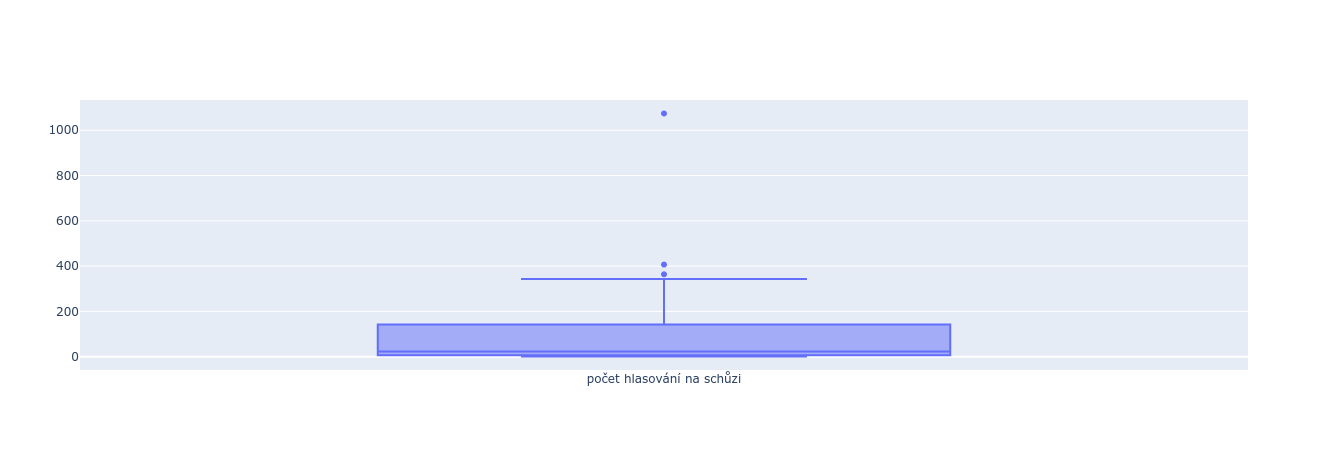

In [57]:
go.Figure(go.Box(y=h.groupby("schuze").size(), name="počet hlasování na schůzi"))

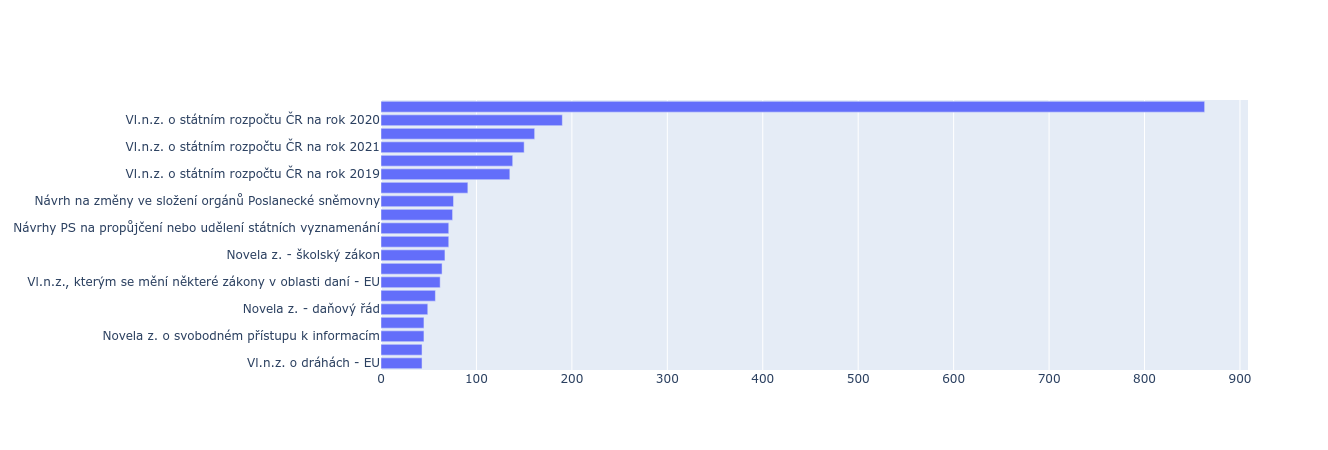

In [58]:
hlasovani_dle_bodu_srs = h[h.bod >= 1].groupby("nazev_dlouhy").size().sort_values(ascending=False)
cnt = 20
y=hlasovani_dle_bodu_srs[:cnt].index[::-1]
x=hlasovani_dle_bodu_srs[:cnt].values[::-1]
go.Figure(go.Bar(x=x, y=y, orientation='h'))

In [59]:
def pocet_dni_na_schuzi(id_schuze):
    return len(h[h.schuze == id_schuze].groupby('datum').size().index)

cnt = 10
schuze_dle_poctu_hlasovani = h.groupby("schuze").count().id_hlasovani.sort_values(ascending=False)
schuze_dle_poctu_hlasovani_str = [f"Během {schuze}. schůze ({pocet_dni_na_schuzi(schuze)} dní) proběhlo {pocet_hlasovani} hlasování, průměrně {pocet_hlasovani/pocet_dni_na_schuzi(schuze):.0f} hlasování za den." 
    for (schuze, pocet_hlasovani) in schuze_dle_poctu_hlasovani.iteritems()]
x = "\n".join(schuze_dle_poctu_hlasovani_str[:cnt])

print(f"Prvních {cnt} schůzí s největším počtem hlasování:\n{x}")

Prvních 10 schůzí s největším počtem hlasování:
Během 30. schůze (687 dní) proběhlo 1074 hlasování, průměrně 2 hlasování za den.
Během 39. schůze (328 dní) proběhlo 407 hlasování, průměrně 1 hlasování za den.
Během 35. schůze (319 dní) proběhlo 364 hlasování, průměrně 1 hlasování za den.
Během 79. schůze (295 dní) proběhlo 343 hlasování, průměrně 1 hlasování za den.
Během 62. schůze (299 dní) proběhlo 340 hlasování, průměrně 1 hlasování za den.
Během 72. schůze (301 dní) proběhlo 340 hlasování, průměrně 1 hlasování za den.
Během 40. schůze (288 dní) proběhlo 338 hlasování, průměrně 1 hlasování za den.
Během 27. schůze (295 dní) proběhlo 334 hlasování, průměrně 1 hlasování za den.
Během 24. schůze (251 dní) proběhlo 329 hlasování, průměrně 1 hlasování za den.
Během 58. schůze (272 dní) proběhlo 314 hlasování, průměrně 1 hlasování za den.


In [60]:
id_schuze_s_nejvetsim_poctem_hlasovani = schuze_dle_poctu_hlasovani.index[0]
#id_schuze_s_nejvetsim_poctem_hlasovani.groupby('datum')
#pocet_dni = len(hlasovani_df[hlasovani_df.schuze == id_schuze_s_nejvetsim_poctem_hlasovani].groupby('datum').count().index)
                
print(f"Největší počet hlasování ({schuze_dle_poctu_hlasovani.iloc[0]}) proběhl během {id_schuze_s_nejvetsim_poctem_hlasovani}. schůze ({pocet_dni_na_schuzi(id_schuze_s_nejvetsim_poctem_hlasovani)} dní).")
d = h[(h.schuze == id_schuze_s_nejvetsim_poctem_hlasovani) & (h.bod >= 1)].groupby("nazev_dlouhy").size().sort_values(ascending=False)

d

Největší počet hlasování (1074) proběhl během 30. schůze (687 dní).


nazev_dlouhy
Novela z. o evidenci tržeb - EU                                           834
Návrhy PS na propůjčení nebo udělení státních vyznamenání                  51
Novela z. o místních poplatcích                                            18
Novela z. o léčivech                                                       12
Vyjádření nesouhlasu s postupem ruské Dumy, která chce legitimizovat v     11
Novela z. o investičních pobídkách                                         11
Vl.n.z. v souvislosti s podporou výkonu práv akcionářů - EU                 8
Fin.ztráty v souv.s předběžnou zpr.Evropské komise                          6
Novela z. o podpoře sportu                                                  6
Novela z. o zemědělství                                                     5
Novela z. o zpravodajských službách ČR                                      4
Novela z. o podmín. obchod. s povol. na emise skl. plynů - EU               4
Novela z. o soudnictví ve věcech mládeže - EU      

In [61]:
x = 100 * len(h[h.bod < 1]) / len(h)

print(f"{x:.2f}% z hlasování bylo procedurální nebo nemělo přiděleno číslo.")

18.63% z hlasování bylo procedurální nebo nemělo přiděleno číslo.


In [62]:
h[h.prihlaseno < h.kvorum]

id_hlasovani  id_organ  schuze  cislo  bod       cas  pro  proti  \
1526         68545       172      22      8    1  10:23:00    0      0   
3603         70623       172      30    951   10  18:19:00    0      1   
4151         71171       172      35     61  317  10:35:00    0      0   
4977         71997       172      40     40  209  11:08:00    0      0   
5275         72295       172      40    338    0  13:14:00    0      0   
7147         74167       172      62    165    0  08:45:00    0      0   

      zdrzel  nehlasoval  ...  nazev_kratky                     datum  \
1526       0           0  ...          <NA> 2018-11-15 10:23:00+01:00   
3603      88           0  ...          <NA> 2019-06-18 18:19:00+02:00   
4151       0           0  ...          <NA> 2019-10-17 10:35:00+02:00   
4977       0           0  ...          <NA> 2020-01-22 11:08:00+01:00   
5275       0           0  ...          <NA> 2020-03-02 13:14:00+01:00   
7147       0           0  ...          <NA> 2020-10-26 08:45:00+01:00   

                                     bod__KAT   vysledek druh_hlasovani  \
1526                                 normální  zamítnuto       normální   
3603                                 normální  zamítnuto       normální   
4151                                 normální  zamítnuto       normální   
4977                                 normální  zamítnuto       normální   
5275  procedurální nebo bez přiděleného čísla  zamítnuto       normální   
7147  procedurální nebo bez přiděleného čísla  zamítnuto       normální   

     je_zpochybneni je_zmatecne ma_stenozaznam  turn   typ  
1526          False       False          False  <NA>  <NA>  
3603          False       False          False  <NA>  <NA>  
4151          False        True          False  <NA>  <NA>  
4977          False        True          False  <NA>  <NA>  
5275          False       False          False  <NA>  <NA>  
7147          False        True          False  <NA>  <NA>  

[6 rows x 23 columns]

In [63]:
h.groupby('druh_hlasovani').size()

druh_hlasovani
normální    8689
dtype: int64

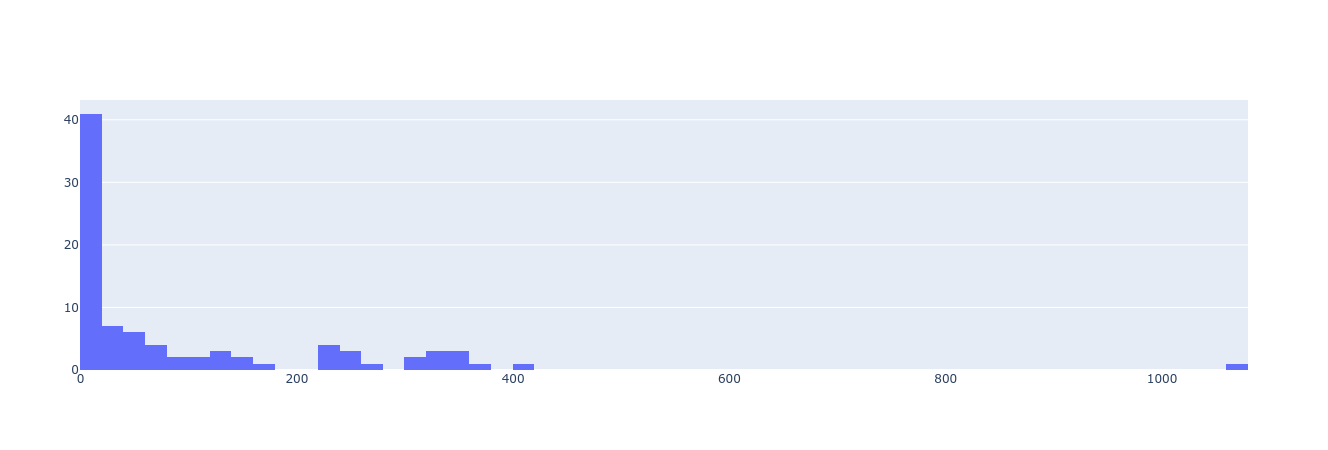

In [64]:
# Počet hlasování na schůzi

s = h.groupby('schuze').size().sort_values()
y = s.index
x = s

go.Figure(go.Histogram(x=x, nbinsx=60))

Na schůzích [10, 21, 71] se nehlasovalo.


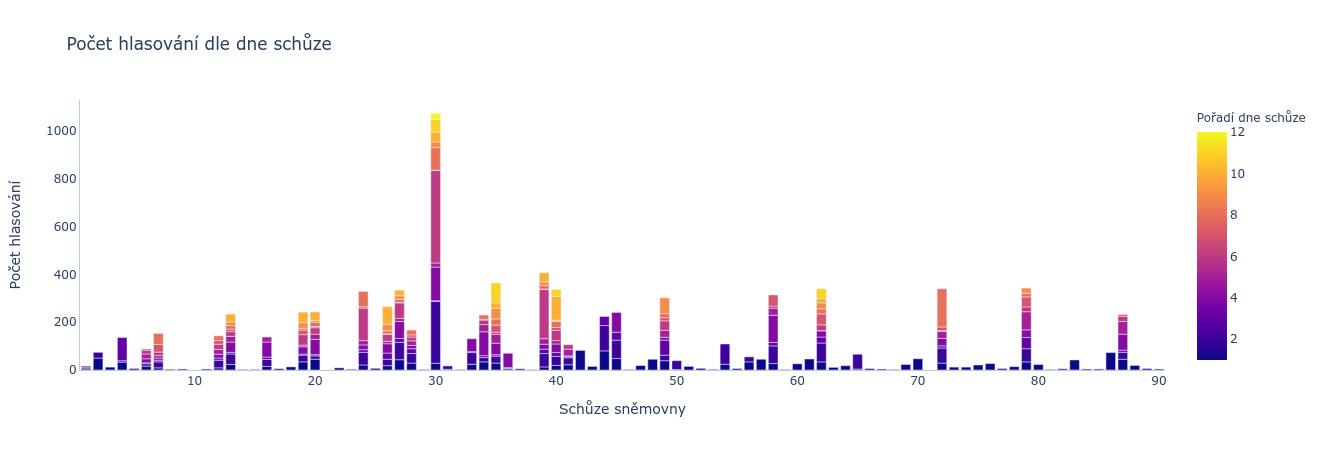

In [65]:
import plotly.express as px
h["pocet_dni_na_schuzi"] = h.groupby(["schuze"]).datum.transform('nunique')

h['den'] = h.datum.dt.date
h["den_schuze"] = h.groupby(["schuze", h.datum.dt.date]).ngroup()
h["den_schuze_min"] = h.groupby(["schuze"]).den_schuze.transform(min)
h["den_schuze_rank"] = (h["den_schuze"] - h["den_schuze_min"] + 1)

x1 = h.groupby(["schuze", 'den', "den_schuze_rank"]).size()
z1 = x1.reset_index(name="pocet_hlasovani")

print(f"Na schůzích {sorted(set(range(z1.schuze.max() + 1)) - set(z1.schuze.unique()) - set([0]))} se nehlasovalo.")
fig = px.bar(z1, x="schuze", y="pocet_hlasovani",
            color="den_schuze_rank",
            hover_data=['schuze', 'den_schuze_rank', 'pocet_hlasovani', 'den'],
            labels={'schuze':'Schůze', 'den': 'Datum', 'den_schuze_rank': 'Pořadí dne schůze', 'pocet_hlasovani': 'Počet hlasování'},
            title="Počet hlasování dle dne schůze")

layout = go.Layout(
    title="Počet hlasování dle dne schůze",    
    plot_bgcolor="#FFFFFF",
    #hovermode="x",
    #hoverdistance=100, # Distance to show hover label of data point
    #spikedistance=1000, # Distance to show spike
    xaxis=dict(
        title="Schůze sněmovny",
        linecolor="#BCCCDC",
        #type='category'
    ),
    yaxis=dict(
        title="Počet hlasování",
        linecolor="#BCCCDC",
        showspikes=True,
        spikethickness=1,
        spikedash="dot",
        spikecolor="#999999",
        spikemode="across",
    )
)

fig.update_layout(layout)

In [66]:
print(f"Poslední běh notebooku: {datetime.now().strftime('%d.%m.%Y %H:%M:%S')}.")

Poslední běh notebooku: 12.03.2021 15:48:38.
